In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import sys
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Read the dataset
data = pd.read_csv('Air pollution Dataset.csv')

In [4]:
print('dataframe shape:', data.shape)

dataframe shape: (43824, 13)


In [5]:
#shows first five rows of the DataFrame
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
#Removing null values

data.dropna(subset=['pm2.5'], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data['datetime'] = data[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
data.sort_values('datetime', ascending=True, inplace=True)

D:\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of pm2.5')

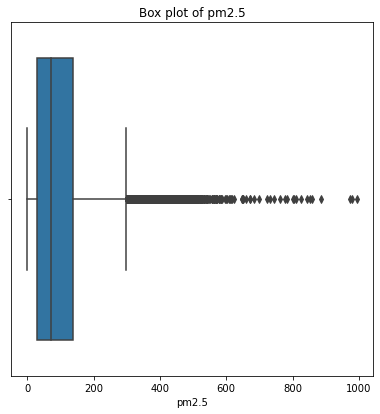

In [8]:
#box plot to visualize distribution of PM2.5
plt.figure(figsize=(6.5, 6.5))
g = sns.boxplot(data['pm2.5'])
g.set_title('Box plot of pm2.5')

Text(0.5, 1.0, 'PM2.5 Time series')

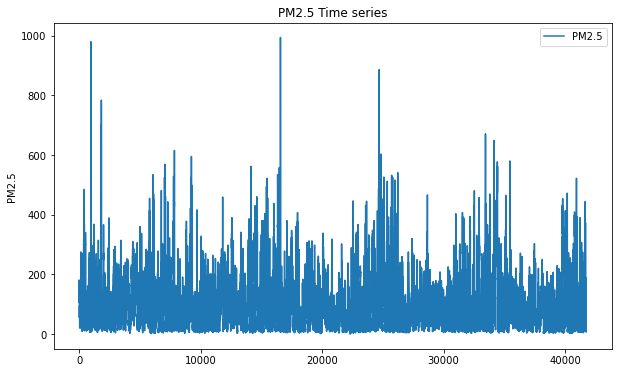

In [9]:
plt.figure(figsize=(10,6))
plt.plot(data['pm2.5'])
plt.legend(['PM2.5'] , loc='upper right')
plt.ylabel('PM2.5')
plt.title('PM2.5 Time series')

D:\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'pm2.5 readings')

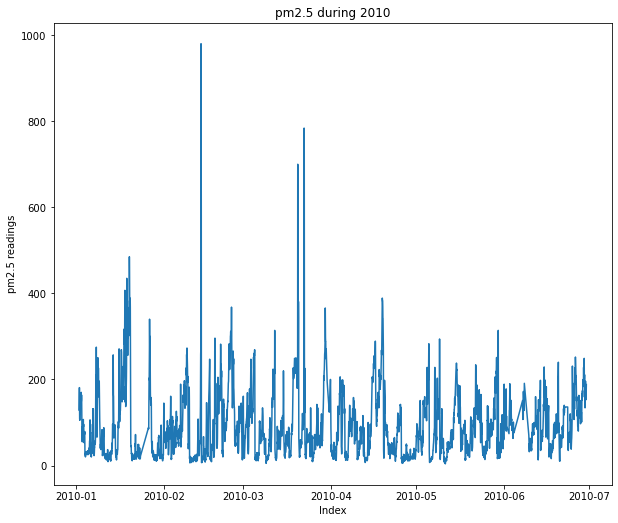

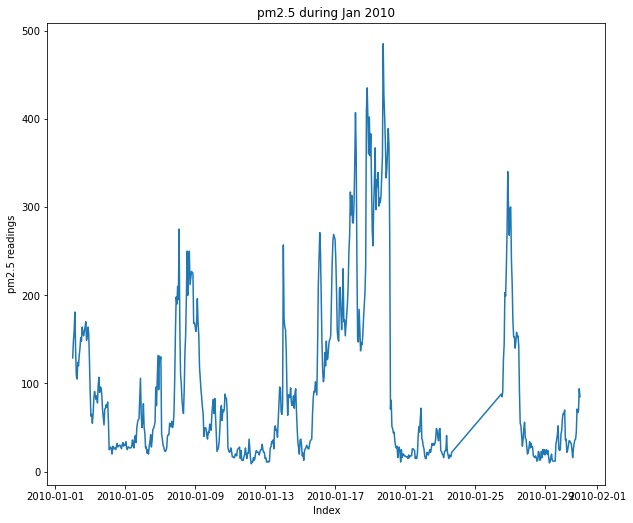

In [10]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=6,day=30)])
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=1,day=31)],)
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_pm2.5'] = scaler.fit_transform(np.array(data['pm2.5']).reshape(-1, 1))

In [12]:
#splitting the dataset into train and test. 
#Dataset contains data from Jan 1st, 2010 to Dec 31st, 2014. 
#The first fours years - 2010 to 2013 is used as train and 2014 is kept for test.

split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
data_train = data.loc[data['datetime']<split_date]
data_test = data.loc[data['datetime']>=split_date]
print('Shape of train:', data_train.shape)
print('Shape of test:', data_test.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [13]:
#First five rows of train
data_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [14]:
#First five rows of validation
data_test.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [15]:
#Reset the indices of the validation set
data_test.reset_index(drop=True, inplace=True)

D:\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Scaled pm2.5 readings')

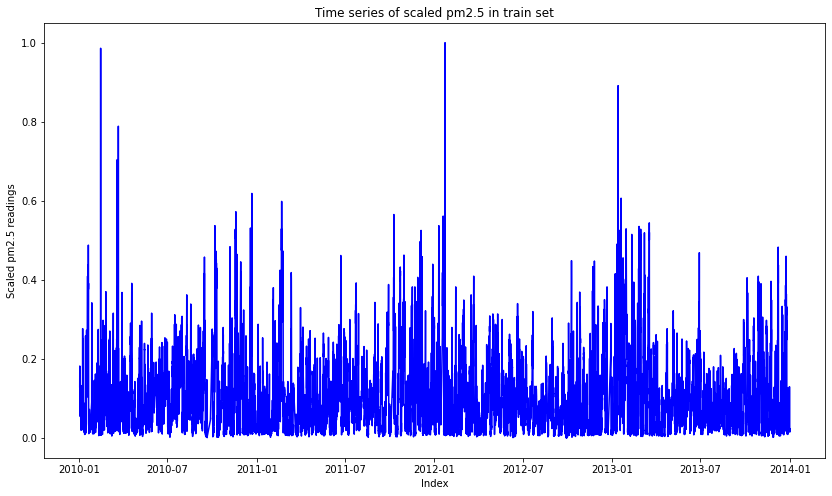

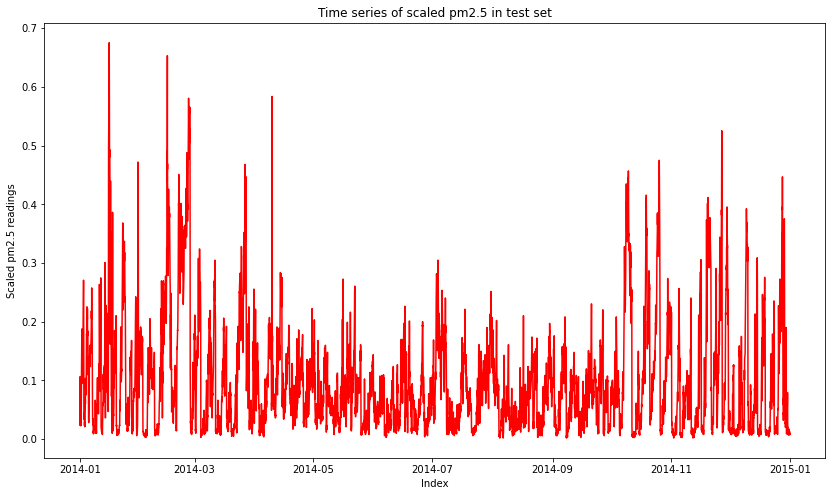

In [16]:
"""
The train and validation time series of scaled_pm2.5 is also plotted.
"""

plt.figure(figsize=(14, 8))
g = sns.lineplot(data_train['datetime'] , data_train['scaled_pm2.5'] , color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(14, 8))
g = sns.lineplot(data_test['datetime'] , data_test['scaled_pm2.5'],   color='r')
g.set_title('Time series of scaled pm2.5 in test set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

In [17]:
def makeXy(time_series, nb_timesteps):
    """
    Input: 
           time_series: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, time_series.shape[0]):
        X.append(list(time_series.loc[i-nb_timesteps:i-1]))
        y.append(time_series.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [18]:
data_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [19]:
X_train =  data_train.drop(['No' , 'year' , 'month' , 'day' , 'hour' , 'cbwd' , 'scaled_pm2.5', 'pm2.5' , 'datetime'] , axis=1 ) 
Y_train =  data_train['scaled_pm2.5']

In [20]:
X_test =  data_test.drop(['No' , 'year' , 'month' , 'day' , 'hour' , 'cbwd' , 'scaled_pm2.5', 'pm2.5' , 'datetime'] , axis=1 ) 
Y_test =  data_test['scaled_pm2.5']

In [21]:
X_train, y_train = makeXy(data_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [22]:
X_test, y_test = makeXy(data_test['scaled_pm2.5'], 7)
print('Shape of test arrays:', X_test.shape, y_test.shape)

Shape of test arrays: (8654, 7) (8654,)


In [23]:
#X_train and X_test are reshaped to 3D arrays
X_train, X_test = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_test.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [25]:
#from keras.layers import Dense, Input, Dropout
#from keras.layers.recurrent import GRU
#from keras.optimizers import SGD
#from keras.models import Model
#from keras.models import load_model
#from keras.callbacks import ModelCheckpoint
from sklearn.linear_model import LinearRegression

In [26]:
xgboostmodel = xgb.XGBRFRegressor(verbosity=0)

ValueError: Found array with dim 3. Estimator expected <= 2.

XGBRFRegressor(verbosity=0)

In [72]:
xgboostmodel.score(X_test , Y_test)

0.21825136139612888

In [77]:
predictions = xgboostmodel.predict(X_test)
predictions_pm25 = scaler.inverse_transform(predictions)
predictions_pm25 = np.squeeze(predictions_pm25)

ValueError: Expected 2D array, got 1D array instead:
array=[0.02578387 0.02578387 0.02578387 ... 0.02439433 0.02439433 0.02439433].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [80]:
from sklearn.metrics import mean_absolute_error

In [79]:
mae = mean_absolute_error(data_test['pm2.5'].loc[7:], predictions_pm25)
print('MAE for the test set:', round(mae, 4))

NameError: name 'predictions_pm25' is not defined

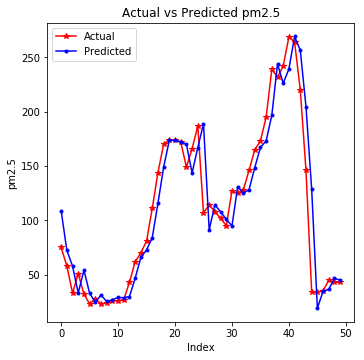

In [45]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), data_test['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), predictions_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.savefig('plot_GRU.jpeg', format='png', dpi=1000)

In [49]:
model = xgb()
model.fit(X_train, y_train)

TypeError: 'module' object is not callable

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [28]:
feature =  data_train.drop(['No' , 'year' , 'month' , 'day' , 'hour' , 'cbwd' , 'scaled_pm2.5', 'pm2.5' , 'datetime'] , axis=1 ) 
label =  data_train['scaled_pm2.5']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(feature,label,test_size=.2)

In [30]:
print(X_train.shape,y_train.shape)

(26476, 6) (26476,)


In [31]:
print(X_test.shape,y_test.shape)

(6620, 6) (6620,)


In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
r2_score(y_test,lr.predict(X_test))

0.252570981398908

In [40]:
import xgboost; print(xgboost.__version__)

1.4.0


In [41]:
from xgboost import XGBRegressor

In [48]:
xgb_model = XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

r2_score(y_test,y_pred)

[06:34:32] WARNING: d:\bld\xgboost-split_1619725139497\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


0.4198255585354449